sat


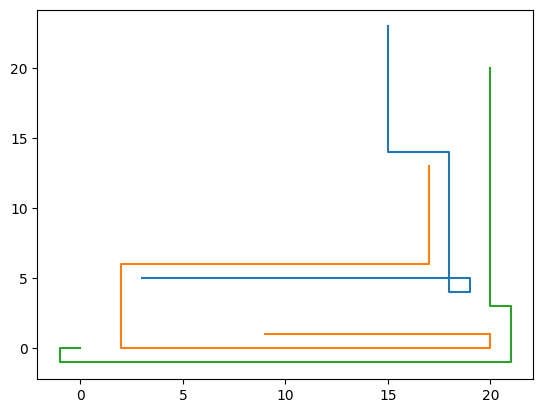

In [260]:
from matplotlib import pyplot as plt

import z3
z3.set_param("parallel.enable", "true")

def Abs(x):
    return z3.If(x >= 0,x,-x)

def Max(x, y):
    return z3.If(x>=y, x, y)

def Min(x, y):
    return z3.If(x<=y, x, y)

def collision(xa1, xa2, ya, xb, yb1, yb2):
    return z3.Or(xb < Min(xa1,xa2) , xb > Max(xa1,xa2) , ya < Min(yb1,yb2) , ya > Max(yb1,yb2))

def make_sig(x, y, n=4):
    return [(x[int(i/2)],x[int(i/2+1)],y[int(i/2)]) if i%2==0 else (x[int(i/2+0.5)],y[int(i/2)],y[int(i/2+0.5)]) for i in range(n)]

def collision_model(sig1, sig2):
    l = []
    for i1, s1 in enumerate(sig1):
        for i2, s2 in enumerate(sig2):
            if i1 % 2 == 0:
                if i2 % 2 == 1:
                    l.append(collision(s1[0], s1[1], s1[2], s2[0], s2[1], s2[2]))
            if i1 % 2 == 1:
                if i2 % 2 == 0:
                    l.append(collision(s2[0], s2[1], s2[2], s1[0], s1[1], s1[2]))
    return l



s = z3.Solver()

xa = [z3.Int(f"xa{i}") for i in range(8)]
ya = [z3.Int(f"ya{i}") for i in range(8)]
xb = [z3.Int(f"xb{i}") for i in range(8)]
yb = [z3.Int(f"yb{i}") for i in range(8)]
xc = [z3.Int(f"xc{i}") for i in range(8)]
yc = [z3.Int(f"yc{i}") for i in range(8)]





sig1 = make_sig(xa, ya, 6)
sig2 = make_sig(xb, yb, 6)
sig3 = make_sig(xc, yc, 6)


s.add(collision_model(sig1, sig2))
s.add(collision_model(sig2, sig3))
s.add(collision_model(sig1, sig3))

        

s.add(xa[0] == 3)
s.add(ya[0] == 5)
s.add(xa[3] == 15)
s.add(ya[3] == 23)

s.add(xb[0] == 9)
s.add(yb[0] == 1)
s.add(xb[3] == 17)
s.add(yb[3] == 13)

s.add(xc[0] == 0)
s.add(yc[0] == 0)
s.add(xc[3] == 20)
s.add(yc[3] == 20)


print(s.check())
m = s.model()
#print(m)



xav = [m[e].as_long() for e in xa if m[e] is not None]
yav = [m[e].as_long() for e in ya if m[e] is not None]
xbv = [m[e].as_long() for e in xb if m[e] is not None]
ybv = [m[e].as_long() for e in yb if m[e] is not None]
xcv = [m[e].as_long() for e in xc if m[e] is not None]
ycv = [m[e].as_long() for e in yc if m[e] is not None]




ptsa = [(xav[int(i/2+0.5)], yav[int(i/2)]) for i in range(len(xav)+len(yav)-1)]
ptsb = [(xbv[int(i/2+0.5)], ybv[int(i/2)]) for i in range(len(xbv)+len(ybv)-1)]
ptsc = [(xcv[int(i/2+0.5)], ycv[int(i/2)]) for i in range(len(xcv)+len(ycv)-1)]

plt.plot(*zip(*ptsa))
plt.plot(*zip(*ptsb))
plt.plot(*zip(*ptsc))
plt.show()



In [243]:
m[m[0]].as_long()

24

In [12]:
def colision(xa1, xa2, ya, xb, yb1, yb2):
    return xb < min(xa1,xa2) or xb > max(xa1,xa2) or ya < min(yb1,yb2) or ya > max(yb1,yb2)

In [14]:
colision(3, 8, 5, 3, 1, 9)

False

In [9]:
l1 = [5, 4, 2, -3,1]
x = 0
y = 0
pts = []
for i, e in enumerate(l1):
    print(f"{i}:{e}")
    if i % 2 == 0:
        x += e
    else:
        y += e
    pts.append((x,y))
print(pts)

0:5
1:4
2:2
3:-3
4:1
[(5, 0), (5, 4), (7, 4), (7, 1), (8, 1)]


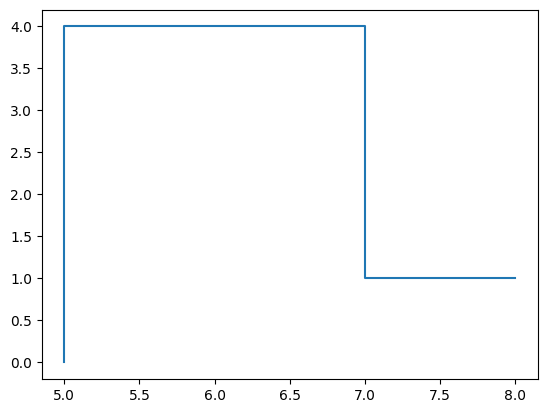

In [10]:
from matplotlib import pyplot as plt
plt.plot(*zip(*pts))

In [116]:
[3,i for i in range(7)]

SyntaxError: did you forget parentheses around the comprehension target? (3726534326.py, line 1)